##**Experiment No-9**

##**Aim: Hand Written Digits Recognition  Using Simple Neural Network**

##**MNIST dataset (Handwritten digit recognation)**



### 1. **Creation and Origin**
The MNIST dataset is a refined version of the NIST (National Institute of Standards and Technology) Special Database 19, initially developed by the U.S. Census Bureau. The original NIST dataset contained handwritten digits provided by American high school students and employees of the Census Bureau. In the 1990s, Yann LeCun and his team curated the MNIST dataset to facilitate machine learning experiments by combining and preprocessing samples from NIST to standardize the data.

- **NIST Sources**:
  - **Training Set**: Originally comprised of digits written by high school students.
  - **Test Set**: Consisted of digits written by Census Bureau employees.

- **Goal of MNIST**: The objective was to create a standardized dataset for benchmarking classification algorithms in machine learning, particularly for optical character recognition (OCR).

### 2. **Dataset Structure**
#### **Images**
- **Image Resolution**: Each digit is centered in a square image with a resolution of **28x28 pixels**, totaling **784 pixels** per image.
- **Grayscale Intensity**: The images are in grayscale, with each pixel's intensity value ranging from **0 to 255**.
  - **0**: Represents a black pixel.
  - **255**: Represents a white pixel.
  - Intermediate values correspond to various shades of gray.

#### **Labels**
- Each image is paired with a label, an integer between **0 and 9**, indicating the digit depicted in the image.
- The labels are stored in a one-dimensional array.

### 3. **Data Preprocessing**
- **Centering**: The handwritten digits are centered within the 28x28 pixel image, ensuring consistent placement.
- **Normalization**: While the original NIST images varied in resolution and placement, MNIST standardizes them by normalizing the images to a fixed size and scaling and positioning the digits consistently.

### 4. **Technical Details**
#### **Training Set and Test Set**
- **Training Set**: Contains 60,000 images and labels, typically used for training machine learning models.
- **Test Set**: Includes 10,000 images and labels, reserved for evaluating the performance of trained models.

#### **Loading the Dataset**
Modern machine learning frameworks like TensorFlow, PyTorch, and Keras offer built-in functions to load the MNIST dataset directly. For example:
- **TensorFlow/Keras**: `tf.keras.datasets.mnist.load_data()`
- **PyTorch**: `torchvision.datasets.MNIST()`

### 5. **Dataset Design**
- **Balanced Classes**: The dataset is relatively well-balanced across the 10 classes, ensuring that each digit appears in the training and test sets with approximately equal frequency.
- **Difficulty Level**: The images vary in difficulty—some digits are clearly written and easy to classify, while others may feature overlapping strokes, noisy backgrounds, or imperfect handwriting. This diversity provides a good test for model robustness.

### 6. **Common Models Used on MNIST**
- **Multilayer Perceptrons (MLP)**: Early successful methods involved simple neural networks with fully connected layers.
- **Convolutional Neural Networks (CNNs)**: Due to the spatial nature of image data, CNNs became a more efficient and effective approach to classifying MNIST digits. These networks exploit the local spatial structure of images and are less prone to overfitting compared to fully connected layers.
- **Autoencoders**: The MNIST dataset has also been used to train and evaluate unsupervised learning algorithms like autoencoders for dimensionality reduction or generating new samples.

### 7. **Performance Metrics**
- **Accuracy**: The primary metric for evaluating performance on the MNIST dataset is classification accuracy, which measures the percentage of correctly classified images.
- **Loss Function**: Cross-entropy loss is commonly used as the loss function for classification models trained on MNIST.
- **Advanced Metrics**: In some cases, more detailed performance metrics like confusion matrices or precision/recall per class may be used to analyze model performance on individual digits.

### 8. **Variations of the MNIST Dataset**
- **Fashion-MNIST**: A modern variant that contains images of clothing items instead of digits, but retains the same image dimensions (28x28 pixels) and the same number of classes (10). This dataset offers a more challenging classification task for newer models.
- **EMNIST**: An extended version of MNIST that includes both letters and digits, increasing the number of classes and samples.
- **KMNIST**: A dataset of handwritten characters from the Japanese Hiragana alphabet, used in similar tasks but with a different alphabet.

### 9. **Challenges and Limitations**
- **Simplicity**: MNIST is considered a relatively simple dataset by modern standards. Most state-of-the-art algorithms achieve accuracies above 99% on this dataset. As a result, it is sometimes criticized for not being representative of real-world challenges in computer vision.
- **Overuse**: Due to its widespread use, there is a risk of overfitting models specifically to MNIST rather than developing models that generalize well to other datasets or tasks.

### 10. **Real-World Applications**
Although the MNIST dataset represents a simplified problem, the techniques and algorithms developed to tackle MNIST have been adapted and applied to more complex real-world problems, such as:
  - **Optical Character Recognition (OCR)** for various languages and document types.
  - **License Plate Recognition** for vehicles.
  - **Handwritten Document Analysis** in historical archives.
  - **Digit and Symbol Recognition** in mathematical notations.



Some example MNIST images are shown below:

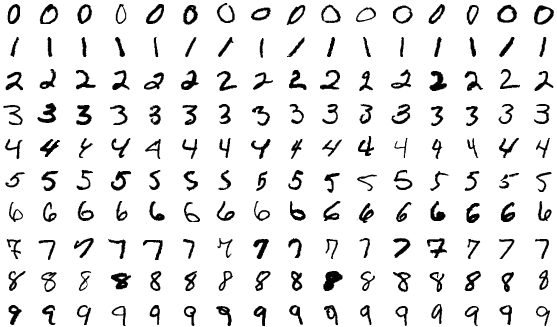

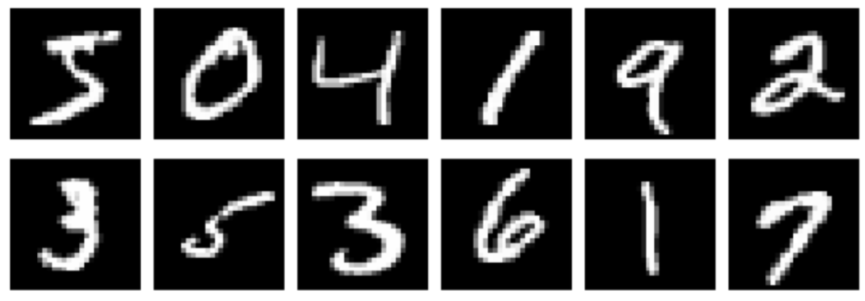

**Information:**
* name : MNIST
* length : 70000

**Input Summary:**
* shape : (28, 28, 1)

**Target Summary:**
* shape : (10,)

**Train images:** 60000

**Test images:** 10000

##**Import Required Libraries**

In [63]:
import cv2
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##**Import ' MNIST ' Dataset**

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##**Check length of train and test dataset**

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

##**Check shape of the image**

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

##**Visualize the first digit from dataset**

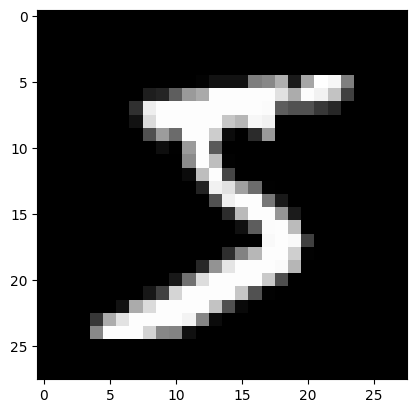

In [9]:
plt.imshow(X_train[0],cmap='gray')

In [10]:
y_train[0]

5

##**Visualize the Third digit from dataset**

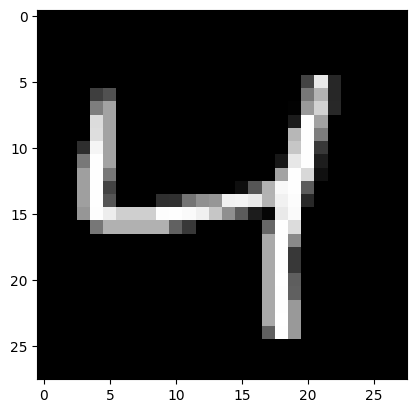

In [11]:
plt.imshow(X_train[2],cmap='gray')

In [12]:
y_train[2]

4

##**Normalize the shape of image**

In [13]:
print(X_train.max())
print(X_train.min())

255
0


In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
print(X_train.max())
print(X_train.min())

1.0
0.0


##**Flatten the inputs images**

In [16]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [17]:
X_train_flattened.shape

(60000, 784)

In [18]:
X_test_flattened.shape

(10000, 784)

##**Build simple neural network with no hidden layers.**

In [19]:
model = keras.Sequential(
        [keras.layers.Dense(10,input_shape=(784,),
        activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###**Different Optimizers**

**Stochastic Gradient Descent (SGD):**  It updates model weights by taking small steps in the direction of the negative gradient of the loss function. It's often used as a baseline optimizer.

**Adam (Adaptive Moment Estimation):** Adam combines elements of both RMSprop and Momentum. It adapts the learning rates for each parameter based on their past gradients, making it well-suited for a wide range of tasks.

**RMSprop (Root Mean Square Propagation):**RMSprop adjusts the learning rates for each parameter individually by dividing the learning rate by the moving average of the squared gradient for that parameter. It helps address the vanishing/exploding gradient problem.



###**Loss functions for classification:**

**Binary Cross-Entropy (BCE)**

 BCE is a commonly used loss function for binary classification problems.

 It measures the difference between the predicted and actual output when the output is binary (e.g., 0 or 1).

 BCE is appropriate when the goal is to optimize the algorithm to classify binary data correctly.

**Formula:**

 **BCE = - (1/n) * Σ[yᵢ * log(ŷᵢ) + (1 - yᵢ) * log(1 - ŷᵢ)]**

Where:

n is the number of samples in the dataset

yᵢ is the i-th actual (ground truth) binary label in the dataset, where yᵢ = 0 or 1.

ŷᵢ is the predicted probability for the i-th sample belonging to the positive class, ranging from 0 to 1.

log(.) represents the natural logarithm.

Σ represents the sum over all i samples in the dataset.


**Categorical Cross-Entropy (CCE)**

Categorical Cross-Entropy (CCE) is a commonly used loss function for multi-class classification problems.

It measures the difference between the predicted and actual output when the output is categorical (e.g., a classification into one of several categories).

CCE is appropriate when optimising the algorithm to classify data into one of several categories correctly.

**Formula: CCE = - (1/n) * ΣΣ yᵢⱼ * log(ŷᵢⱼ)**

Where:

n is the number of samples in the dataset

yᵢⱼ is the actual (ground truth) label of sample i for class j, where yᵢⱼ = 0 or 1

ŷᵢⱼ is the predicted probability of sample i for class j, where the probabilities for all classes sum up to 1

log(.) represents the natural logarithm

Σ represents the sum over all i samples in the dataset,

ΣΣ represents the sum over all classes j.

In [20]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8083 - loss: 0.7300
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9140 - loss: 0.3097
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9217 - loss: 0.2833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9247 - loss: 0.2775
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9278 - loss: 0.2612


In [21]:
model.metrics_names

['loss', 'compile_metrics']

In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9158 - loss: 0.3023


[0.2670338749885559, 0.9271000027656555]

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.7646602e-06, 5.4331133e-11, 1.2555065e-05, 4.0308079e-03,
       4.5307394e-07, 2.6936450e-05, 1.9751632e-10, 9.9565279e-01,
       1.6302018e-05, 2.5735085e-04], dtype=float32)

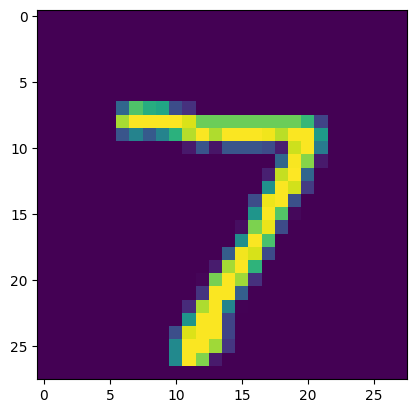

In [24]:
plt.imshow(X_test[0])

###**Finds a maximum value element from an array and returns the index of it**

In [25]:
np.argmax(y_predicted[0])

7

In [26]:
from sklearn.metrics import classification_report

In [27]:
predictions = model.predict(X_test_flattened)

predicted_classes = predictions.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [28]:
y_test[0]

7

In [29]:
predicted_classes[0]

7

In [30]:
y_test[50:80]

array([6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
       2, 9, 1, 7, 3, 2, 9, 7], dtype=uint8)

In [31]:
predicted_classes[50:80]

array([6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0,
       2, 9, 1, 7, 3, 2, 9, 7])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.94      0.93       982
           5       0.90      0.89      0.89       892
           6       0.94      0.95      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.86      0.90      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [33]:
conf_matrix = tf.math.confusion_matrix(labels=y_test,predictions=predicted_classes)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    2,    0,    6,    8,    3,    3,    1],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   3,    9,  921,   18,    8,    5,   12,   10,   42,    4],
       [   0,    0,   18,  923,    1,   29,    2,    9,   19,    9],
       [   1,    1,    3,    1,  921,    0,   11,    3,   11,   30],
       [   7,    3,    2,   28,    6,  793,   12,    4,   31,    6],
       [   8,    3,    7,    1,    8,   14,  911,    2,    4,    0],
       [   1,    6,   20,   10,    8,    1,    0,  942,    5,   35],
       [   3,    6,    5,   22,    9,   28,    7,    8,  879,    7],
       [   9,    7,    1,   11,   31,    7,    0,   17,    9,  917]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

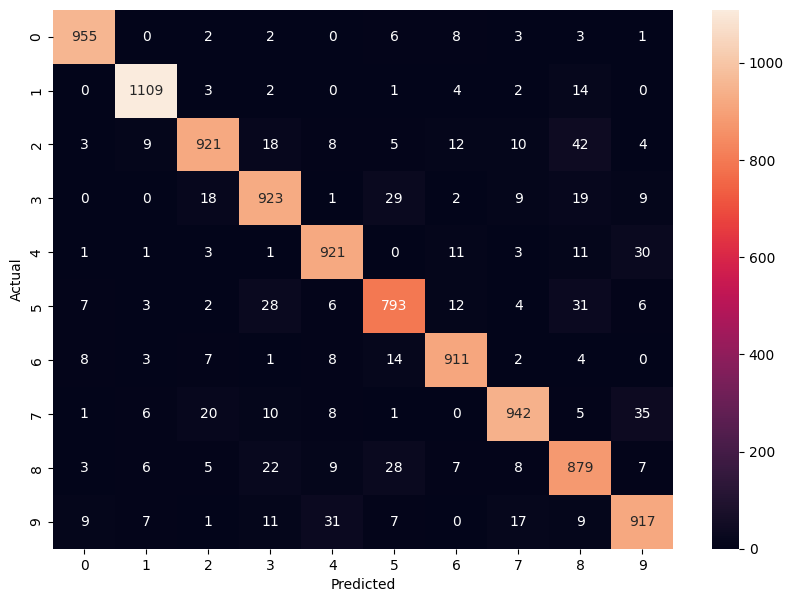

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

##**Add hidden layers to improve the accuracy**

In [35]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8781 - loss: 0.4409
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9611 - loss: 0.1295
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9751 - loss: 0.0825
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9818 - loss: 0.0593
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9862 - loss: 0.0468


In [36]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9701 - loss: 0.0983


[0.0825674831867218, 0.9747999906539917]

In [37]:
# Assuming you have a Sequential model called 'model'
y_predicted = model.predict(X_test_flattened)  # x is your input data

# To get the class with the highest probability for each input:
y_predicted_labels = predictions.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Text(95.72222222222221, 0.5, 'Actual')

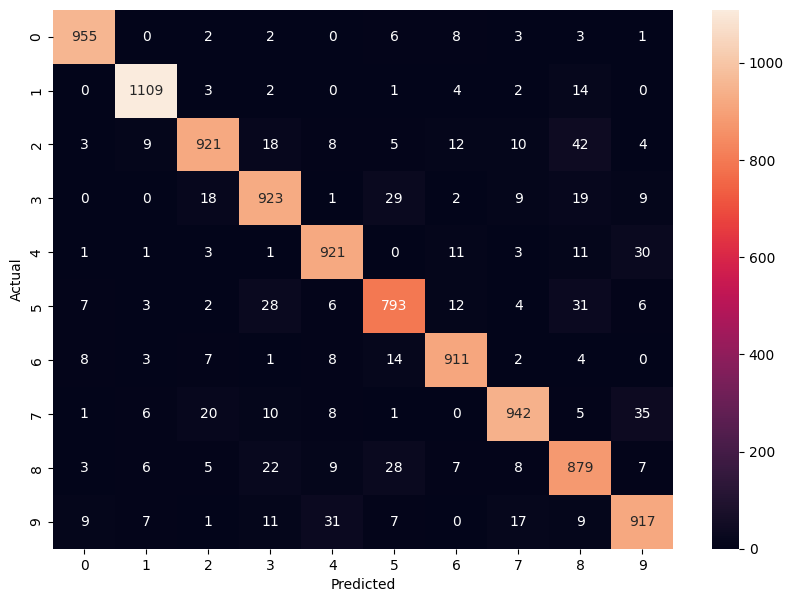

In [38]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

##**Use Flatten layer in model directly**

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8743 - loss: 0.4342
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9648 - loss: 0.1112
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9770 - loss: 0.0757
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9823 - loss: 0.0552
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9862 - loss: 0.0453


In [40]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9734 - loss: 0.0931


[0.08266212791204453, 0.9771999716758728]

##**Task**
1. Import "fashion MNIST" (fashion_mnist) dataset from keras.datasets.
2. Write down the short explaination about dataset.
3. Apply simple neural network (without hidden layers) on the fashion_mnist to classify the data with 'softmax' activation function.
4. Add hidden layers to improve the classification accuracy of the model.
5. Draw confusion matrix and classification report based on obtained results.


In [1]:
from keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
len(X_train)

60000

In [40]:
len(X_test)

**About Dataset**

**Context**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

**Content**

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


**Labels**

Each training and test example is assigned to one of the following labels:

0) T-shirt/top

1) Trouser

2) Pullover

3) Dress

4) Coat

5) Sandal

6) Shirt

7) Sneaker

8) Bag

9) Ankle boot

TL;DR

Each row is a separate image.

Column 1 is the class label.

Remaining columns are pixel numbers (784 total).

Each value is the darkness of the pixel (1 to 255).

In [41]:
X_train[0].shape

(28, 28)

In [42]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [43]:
y_train[0]

5

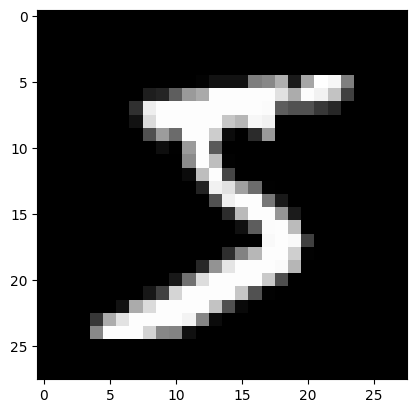

In [44]:
plt.imshow(X_train[0], cmap='gray')

In [45]:
y_train[0]

5

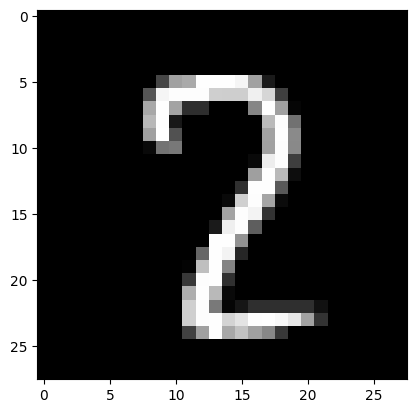

In [46]:
plt.imshow(X_train[41234], cmap='gray')

In [47]:
y_train[41234]

2

In [48]:
print(X_train.max())
print(X_train.min())

1.0
0.0


In [49]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [50]:
X_train_flattened.shape

(60000, 784)

In [51]:
X_test_flattened.shape

(10000, 784)

In [52]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8161 - loss: 0.7105
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9149 - loss: 0.3103
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9202 - loss: 0.2834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9235 - loss: 0.2678
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9253 - loss: 0.2664


In [53]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9137 - loss: 0.3031


[0.26871153712272644, 0.925000011920929]

In [54]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([4.7057629e-06, 7.3580392e-11, 1.9778152e-05, 5.6193592e-03,
       5.3082954e-07, 2.3684945e-05, 1.9657773e-10, 9.9402028e-01,
       1.6310949e-05, 2.9529273e-04], dtype=float32)

In [55]:
y_predicted[0].argmax()

7

In [56]:
predictions =  model.predict(X_test_flattened)
predicted_classes = predictions.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [57]:
y_test[9000:9050]

array([7, 6, 1, 1, 0, 1, 2, 3, 4, 7, 2, 3, 4, 5, 6, 7, 0, 1, 2, 7, 8, 6,
       3, 9, 7, 1, 9, 3, 9, 6, 1, 7, 2, 4, 4, 5, 7, 0, 0, 1, 6, 6, 8, 2,
       7, 7, 2, 4, 2, 1], dtype=uint8)

In [58]:
predicted_classes[9000:9050]

array([7, 6, 1, 1, 0, 1, 2, 8, 4, 2, 8, 3, 4, 6, 6, 2, 0, 1, 2, 2, 8, 6,
       3, 9, 2, 1, 9, 3, 9, 6, 1, 2, 2, 4, 4, 5, 2, 0, 0, 1, 6, 6, 8, 2,
       7, 2, 8, 4, 2, 1])

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_classes))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.90      0.91      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.86      0.89       892
           6       0.96      0.94      0.95       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.89      0.89       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.92     10000



In [60]:
confusion_matrix= tf.math.confusion_matrix(labels=y_test,predictions=predicted_classes)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    3,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1111,    4,    2,    0,    1,    3,    2,   12,    0],
       [   4,    6,  940,   15,   10,    2,   10,   10,   32,    3],
       [   4,    0,   25,  917,    1,   22,    2,   10,   22,    7],
       [   2,    1,    8,    1,  927,    0,    4,    4,   11,   24],
       [  10,    3,    9,   36,   11,  770,   10,    7,   30,    6],
       [  14,    3,   13,    1,    8,   16,  899,    2,    2,    0],
       [   1,    6,   26,    5,    9,    1,    0,  953,    2,   25],
       [   6,    6,    8,   22,   10,   24,    9,   14,  871,    4],
       [   9,    7,    3,   11,   33,    5,    0,   35,    9,  897]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

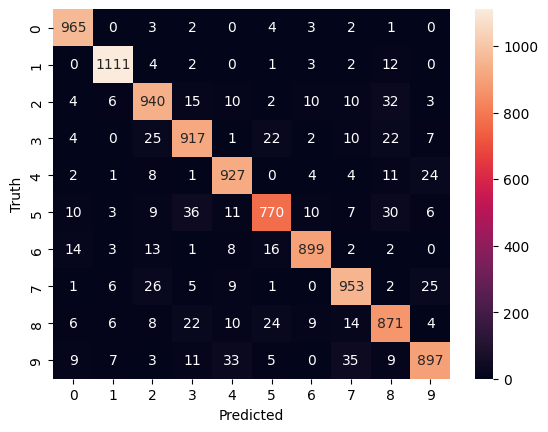

In [64]:
sns.heatmap(confusion_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")


In [65]:
model= keras.Sequential(
    [keras.layers.Dense(100,input_shape=(784,),activation="relu"),
     keras.layers.Dense(100,input_shape=(784,),activation="relu"),
     keras.layers.Dense(10,activation="softmax")])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train_flattened,y_train,epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8768 - loss: 0.4214
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9660 - loss: 0.1090
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9783 - loss: 0.0701
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9836 - loss: 0.0538
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9872 - loss: 0.0406
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9895 - loss: 0.0339
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9908 - loss: 0.0283
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9923 - loss: 0.0228
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9926 - loss: 0.0210
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9940 - loss: 0.0183


In [66]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1306


[0.10800329595804214, 0.9731000065803528]

In [67]:
predictions =  model.predict(X_test_flattened)
predicted_classes = predictions.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [69]:
confusion_matrix= tf.math.confusion_matrix(labels=y_test,predictions=predicted_classes)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    1,    0,    0,    1,    1,    0,    2,    1],
       [   0, 1123,    1,    1,    0,    1,    4,    0,    5,    0],
       [   7,    0, 1013,    0,    1,    0,    1,    4,    6,    0],
       [   2,    0,    7,  989,    0,    6,    0,    2,    4,    0],
       [   5,    0,   13,    0,  944,    2,    7,    6,    2,    3],
       [   2,    1,    0,    7,    0,  875,    6,    1,    0,    0],
       [   9,    3,    2,    1,    1,    6,  935,    0,    1,    0],
       [   5,    3,   19,    0,    1,    0,    0,  993,    2,    5],
       [   5,    0,    5,    3,    4,    9,    1,    6,  940,    1],
       [   9,    2,    4,    6,   12,   10,    0,   13,    8,  945]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

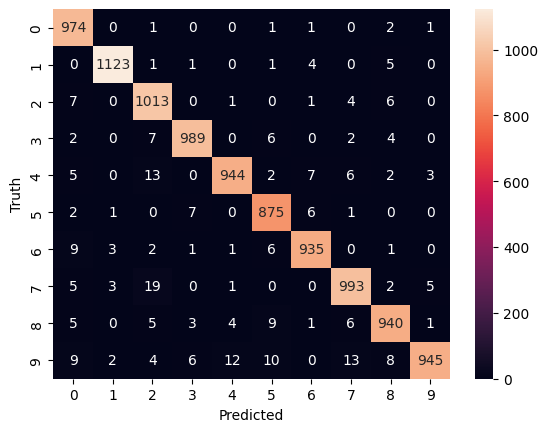

In [70]:
sns.heatmap(confusion_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

#**Conclusion**

We successfully implemented Handwritten Digit Recognition using the MNIST dataset with a Neural Network. Additionally, we developed a neural network to recognize images from the Fashion MNIST dataset.